In [ ]:
import plumed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from SCRIPTS.func_block import read_fes_3d
import os
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [84]:
FOLDER = 'S5-S6_apo-CA/mw_0.85' #'S5-S6_adapted-MG/mw_0.8'#'S5-S6_adapted-CA/mw_0.85'#'System.0.MGb_bc/METAD.3D.b5h0.3'

In [85]:
if not os.path.exists(f'{FOLDER}/reweight_trj'):
	os.mkdir(f'{FOLDER}/reweight_trj')


BIASF = 5
CV=['cn', 'd_580', 'd_489']

DT=50
kBT=310*8.314462618*0.001

N_walkers = 4
Tminmax = [0.5, 2]
RESI=[489, 580]

REW_COLS = ['ca', 'cg',
        'ch1_489', 'ch2_489', 'ch1_580', 'ch2_580', 
        'cat_489od1', 'cat_489od2', 'cat_580od1', 'cat_580od2', 
        ]
COLS = [*CV, *REW_COLS]


# 1. Создаем df - таблицу с CV (d_489, d_580, cn) и значениями переменных из траектории в те же моменты времени

In [86]:
# try: 
#     df_CV = pd.read_csv(f'{FOLDER}/COLVAR_reweighting_{N_walkers}walkers.csv', sep = '\t')
# except FileNotFoundError:
df_CV = pd.DataFrame()
for w in range(N_walkers):
    cvlr = plumed.read_as_pandas(f'{FOLDER}/walker_{w}/COLVAR.{w}')
    COLVARw = cvlr[(Tminmax[0]*1000**2 <= cvlr['time']) & (cvlr['time'] <= Tminmax[1]*1000**2)]# & (cvlr['time'] < Tmax*1000**2)]
    COLVARw['time'] = COLVARw['time'].astype(int)

    df_full = COLVARw[COLVARw['time']%DT==0]
    for col in REW_COLS: 
        if col[:2] == 'ch':
            dfolder = 'dihedral'
        else: 
            dfolder = 'dist'
        df_col = pd.read_csv(f'{FOLDER}/walker_{w}/{dfolder}/{col}_gp t_0--1 dt_{DT}.csv', 
                                header = None, names = ['t', col])
        df_col['t'] = df_col['t'].astype(int)

        df_full = df_full.merge(df_col, left_on='time', right_on='t').drop(columns='t')

    df_CV = pd.concat([df_CV, df_full])
    
df_CV.to_csv(f'{FOLDER}/COLVAR_reweighting_{N_walkers}walkers.csv', index = False, sep = '\t')

df_CV

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/veretenenko/miniconda3/envs/plumed/lib/libplumedKernel.so" +++
/tmp/ipykernel_121160/2160144092.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cvlr = plumed.read_as_pandas(f'{FOLDER}/walker_{w}/COLVAR.{w}')


/tmp/ipykernel_121160/2160144092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COLVARw['time'] = COLVARw['time'].astype(int)
+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/veretenenko/miniconda3/envs/plumed/lib/libplumedKernel.so" +++
/tmp/ipykernel_121160/2160144092.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cvlr = plumed.read_as_pandas(f'{FOLDER}/walker_{w}/COLVAR.{w}')
/tmp/ipykernel_121160/2160144092.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,time,d_489,d_580,cn,d_484,d_576,metadP.bias,ca,cg,ch1_489,ch2_489,ch1_580,ch2_580,cat_489od1,cat_489od2,cat_580od1,cat_580od2
0,500000,1.773700,1.048590,6.896773,1.900297,1.494457,22.608105,10.14710,7.73083,-58.2852,99.5621,-59.5928,105.7960,17.5360,16.8320,10.7440,9.3942
1,500050,2.147519,1.448714,6.268084,2.189829,1.845960,14.150411,10.01310,7.50399,-37.5670,87.3463,-75.6801,82.4799,21.6392,20.5438,14.4560,13.6036
2,500100,2.234802,1.755538,7.330702,2.264739,2.035705,38.671083,9.72091,5.59292,-53.0096,77.1662,-53.1099,158.8040,22.0030,21.6923,18.1759,16.6024
3,500150,2.497966,1.904153,6.676323,2.492228,2.253595,27.916319,10.10700,6.71734,-35.5659,87.0183,-56.5801,92.8528,25.1166,24.0030,19.5852,17.8829
4,500200,2.655899,2.074677,7.679220,2.692734,2.421489,24.194919,10.32870,7.18446,-43.4153,86.5682,-64.2111,118.0750,26.7089,25.6309,20.8668,19.6076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,1999800,1.469828,1.493917,8.067530,1.674883,1.600617,37.541720,9.43281,5.57919,-59.8985,-86.2518,-69.2815,-87.7757,13.8871,15.0650,14.5541,14.2296
29997,1999850,1.542416,1.677570,6.294603,1.815466,1.610840,43.629048,9.47914,5.82865,-47.7594,-82.3103,-136.2560,28.9851,14.3139,16.0763,16.1803,16.8289
29998,1999900,1.733718,1.740161,7.154413,1.948985,1.735823,52.655864,9.42151,5.71411,-52.9546,-80.5521,-125.9540,26.8962,16.2741,17.6715,16.6921,17.3823
29999,1999950,2.032824,2.155727,7.403881,2.345202,2.097780,42.770610,9.33425,6.02890,-54.5299,-42.2571,-172.5680,24.3993,19.1347,20.8023,21.2796,22.0658


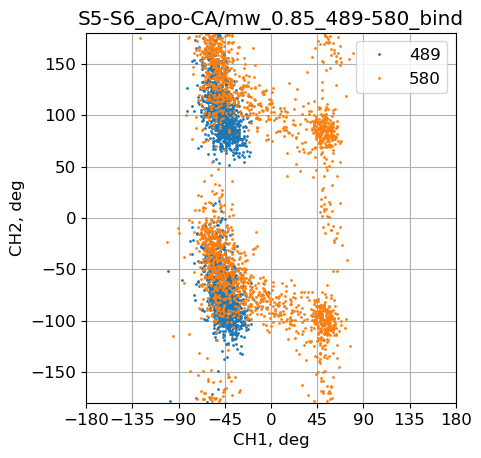

In [87]:
df_CV_bind = df_CV[(df_CV['d_489'] < 0.4) & (df_CV['d_580']<0.4) ]


fig, ax = plt.subplots()
plt.plot(df_CV_bind['ch1_489'], df_CV_bind['ch2_489'], '.', markersize=2, label = '489')
plt.plot(df_CV_bind['ch1_580'], df_CV_bind['ch2_580'], '.', markersize=2, label = '580')

ax.set_xticks(np.arange(-180, 181, 45))
ax.set_xlim(-180, 180)
# ax.set_yticks(np.arange(-180, 181, 45))
ax.set_ylim(-180, 180)
#ax.set_title(f'D{RESI[i]}')
plt.legend()
ax.set_xlabel('CH1, deg')
ax.set_ylabel('CH2, deg')
ax.set_aspect('equal', 'box')
plt.title(f'{FOLDER}_489-580_bind')
plt.grid()

# 2. Чтение Ubias final

In [88]:
dist1, dist2, cn, fes, Nbins_D1, Nbins_D2, Nbins_CN, Bonds_D1, Bonds_D2, Bonds_CN = read_fes_3d(FOLDER)
fes -= np.max(fes)

+++ Loading the PLUMED kernel runtime +++
+++ PLUMED_KERNEL="/home/veretenenko/miniconda3/envs/plumed/lib/libplumedKernel.so" +++
/home/veretenenko/TRPV6-Mg/ScaledTopology-final/SCRIPTS/func_block.py:220: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = plumed.read_as_pandas(f"{FOLDER}/FES/{NAME}.dat")


240 239 242 [0.0708247, 4.29003] [0.0663656, 4.26809] [0.798874, 9.31687]


In [89]:
#df_CV = df_CV_bind

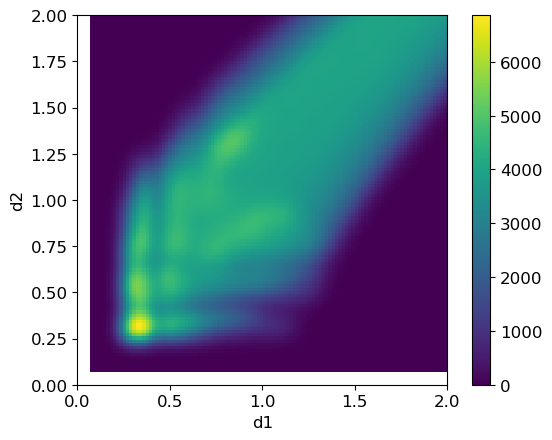

(0.0, 2.0)

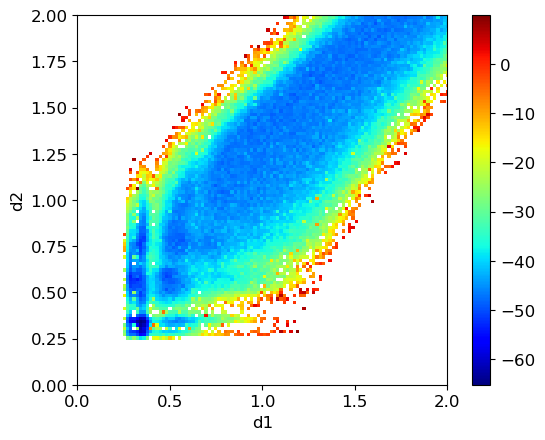

In [90]:
Ubias = -fes * (1-1/BIASF)

WEIGHTS_CV, ED_CV = np.histogramdd(df_CV[['cn', 'd_580', 'd_489']].to_numpy(), 
                            bins = [Nbins_CN, Nbins_D2, Nbins_D1],
                            range = (Bonds_CN, Bonds_D2, Bonds_D1),
                            density=True, 
                            )
h = plt.imshow(np.sum(Ubias, axis=0).T, 
           extent = [ED_CV[2][0], ED_CV[2][-1], ED_CV[1][0], ED_CV[1][-1]],
           aspect='equal',
        origin='lower',
           interpolation=None)
plt.colorbar(h)
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.show()

weighted_avg = np.sum(np.exp(1/kBT * Ubias) * WEIGHTS_CV, axis=0)
weighted_avg[weighted_avg==0]=np.nan
norm = np.sum(np.exp(1/kBT * (Ubias-np.max(Ubias))))
fes_dens = -kBT * np.log(weighted_avg/norm)

h = plt.imshow(fes_dens.T, 
           extent = [ED_CV[2][0], ED_CV[2][-1], ED_CV[1][0], ED_CV[1][-1]],
           aspect='equal',
        origin='lower',
        cmap='jet',
           interpolation=None)
plt.colorbar(h)
plt.xlabel('d1')
plt.ylabel('d2')
plt.title('')
plt.xlim(0, 2)
plt.ylim(0, 2)

# 3. Reweighting на переменные

In [91]:
from scipy.ndimage import gaussian_filter

In [92]:
def func_reweight_2D(CV1, CV2, BINS1, BINS2, RANGE1, RANGE2, emax = None, xlim=None, ylim=None, cmap='terrain'):   
   
    ED_new = [
        np.linspace(*RANGE1, BINS1), 
        np.linspace(*RANGE2, BINS2), 

    ]
    I_cn = np.searchsorted(ED_CV[0], df_CV['cn'], side='left') - 1
    I_d2 = np.searchsorted(ED_CV[1], df_CV['d_580'], side='left') - 1
    I_d1 = np.searchsorted(ED_CV[2], df_CV['d_489'], side='left') - 1

    I_new1 = np.searchsorted(ED_new[0], df_CV[CV1], side='left') - 1
    I_new2 = np.searchsorted(ED_new[1], df_CV[CV2], side='left') - 1
    # I_newcn = np.searchsorted(ED_new[2], df_CV['cn'], side='left') - 1

    Ubias = -fes * (1-1/BIASF)
    weight = np.zeros([BINS1, BINS2])
    for t in range(df_CV.shape[0]):
        weight[I_new1[t], I_new2[t]] += np.exp(Ubias[I_cn[t], I_d2[t], I_d1[t]]/kBT)
    weight[weight==0]=np.nan


    fes_dens = -kBT * (np.log(weight))# - scipy.special.logsumexp(weight[~np.isnan(weight)]))
    fes_dens -= np.nanmin(fes_dens)
    print(np.isnan(fes_dens))
    fes_dens[np.isnan(fes_dens)] = np.nanmax(fes_dens)
    if emax is None: 
        emax = np.nanmax(fes_dens)//10 * 10
    zi_smoothed = gaussian_filter(fes_dens.reshape([BINS1, BINS2]), sigma=0.5)
    h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T, 
                cmap = cmap,#'jet', 
                origin = 'lower',
                aspect = 'equal',
                
                # vmin=0,
                # vmax=100
                levels = 15, #np.linspace(0, emax, 20), 
                alpha=0.5,
                # algorithm='threaded'
                #extend='max'
                )
    # h  = plt.imshow(fes_dens.T, 
    #             extent = [*RANGE1, *RANGE2],
    #             origin='lower',
    #             cmap=cmap, ##'magma',
    #             vmax = np.nanmax(fes_dens),
    #             interpolation='gaussian'
    #         )

    # zi_smoothed = gaussian_filter(fes_dens.reshape([BINS1, BINS2]), sigma=0.4)
    # plt.contour(ED_new[0], ED_new[1], zi_smoothed.T, #zi_smoothed.T, 
    #             colors = 'k', 
    #             linewidths=1,
    #             #cmap='jet',
    #             #levels=7,
    #             levels = 4,#np.lins(0, np.nanmax(fes_dens)+1, np.nanmax(fes_dens)//5), 
    #             zorder = 10
    #             )


    plt.colorbar(h, label = 'FES, kJ/mol')

    plt.xlabel(CV1)
    plt.ylabel(CV2)
    plt.title(f'{FOLDER}_{CV1}-{CV2}')
    plt.grid()
    if xlim is None: 
        xlim = RANGE1
    plt.xlim(xlim)
    if ylim is None: 
        ylim = RANGE2
    plt.ylim(ylim)
    #plt.savefig(f'{FOLDER}/reweight_trj/reweight_{CV1}-{CV2}.svg', dpi=300, bbox_inches = 'tight')

In [93]:
from sklearn.cluster import DBSCAN
from scipy.stats import gaussian_kde


In [94]:
# df_CV_bind = df_CV[(df_CV['d_489'] < 0.4) & (df_CV['d_580']<0.4) ]

# x, y = df_CV_bind['ch1_489'], df_CV_bind['ch2_489']
# # Кластеризация
# coords = np.vstack([x, y]).T
# clustering = DBSCAN(eps=2, min_samples=3).fit(coords)
# unique_labels = set(clustering.labels_)

# # Выбор одной точки из каждого кластера
# filtered_x, filtered_y = [], []
# for label in unique_labels:
#     if label != -1:  # Игнорируем шум
#         cluster_points = coords[clustering.labels_ == label]
#         filtered_x.append(cluster_points[0][0])
#         filtered_y.append(cluster_points[0][1])

# # Визуализация
# #plt.contourf(xi, yi, zi, cmap='viridis', alpha=0.5)
# #plt.scatter(x, y, c='red', s=1, alpha=1)
# plt.scatter(filtered_x, filtered_y, c='blue', s=10, alpha=0.5)


# # Оценка плотности точек
# kde = gaussian_kde(np.vstack([x, y]))
# density = kde(np.vstack([x, y]))

# # Нормализация плотности для alpha (чем выше плотность, тем прозрачнее точка)
# alpha = 0.3 / (1 + 10 * density / density.max())  # Коэффициенты подберите под ваш случай
# plt.scatter(x, y, c='green', s=10, alpha=alpha, edgecolors='none')

# plt.show()


In [95]:
FOLDER

'S5-S6_apo-CA/mw_0.85'

In [96]:
dens_const = {
    'S5-S6_adapted-MG/mw_0.8':5,

    'S5-S6_adapted-CA/mw_0.85':2,
    'S5-S6_apo-MG/mw_0.8':5,
        'S5-S6_apo-CA/mw_0.85':1,


}

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


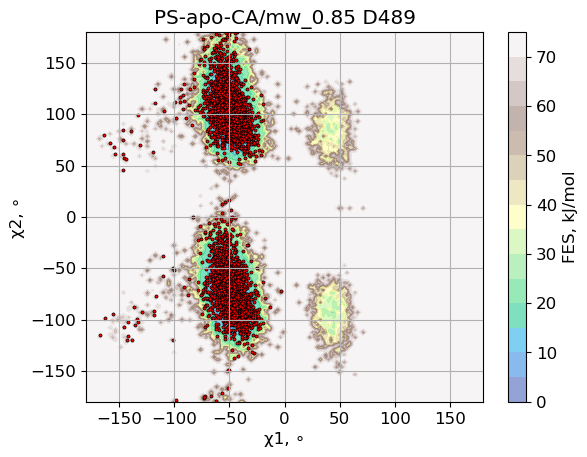

[[False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]
 ...
 [ True False False ...  True False  True]
 [False False False ... False False  True]
 [ True  True  True ...  True  True  True]]


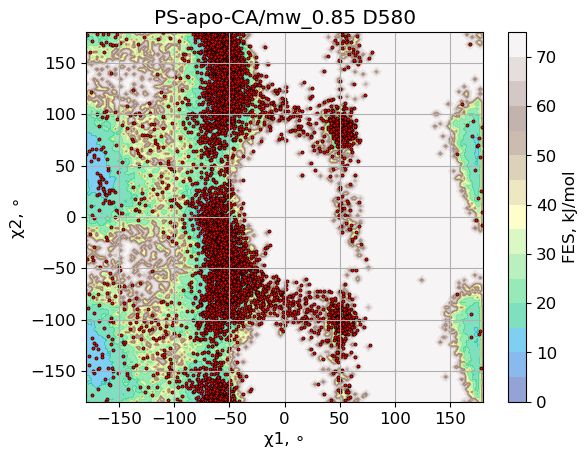

In [97]:
for res in [489, 580]:
        func_reweight_2D(f'ch1_{res}', f'ch2_{res}', 150, 150, [-180, 180], [-180, 180], # 30, 
                        cmap='terrain'
                        #  xlim=(0, 2), 
                        #  ylim=(0, 2)
                        )
        # plt.scatter(df_CV_bind['ch1_489'].iloc[::1], df_CV_bind['ch2_489'].iloc[::1],  
        #             s=0.1, marker='x',color = 'r', #alpha=0.5
        #             zorder = 5,
        #         facecolors="None", 
        # )
                #edgecolors = 'w', linewidths = 0.2)
        # plt.scatter(filtered_x, filtered_y, c='k', s=2, alpha=1, marker='x')

        df_CV_bind = df_CV[(df_CV[f'd_{res}'] < 0.4) & (df_CV[f'd_{res}']<0.4) ]

        x, y = df_CV_bind[f'ch1_{res}'], df_CV_bind[f'ch2_{res}']
        # Оценка плотности точек
        kde = gaussian_kde(np.vstack([x, y]))
        density = kde(np.vstack([x, y]))

        alpha = 1 / (1 + dens_const[FOLDER] * density / density.max())  # Коэффициенты подберите под ваш случай

        plt.scatter(x, y, c='red', s=20, #alpha=alpha, 
                marker='.', edgecolors='k', linewidth=0.5)
        FOLDER.split('/')
        plt.xticks([-150, -100, -50, 0, 50, 100, 150])
        plt.yticks([-150, -100, -50, 0, 50, 100, 150])

        s = FOLDER.split('/')[0].split('-')[1].split('_')[1]
        if s != 'apo':
                s = ''
        else: 
                s = f'-{s}'
        plt.title(f'PS{s}-{FOLDER.split('/')[0].split('-')[2]}/{FOLDER.split('/')[1]} D{res}')
        plt.xlabel('χ1, ∘')
        plt.ylabel('χ2, ∘')
        
        plt.savefig(f'{FOLDER}/ch1_ch2_{res}.png', bbox_inches = 'tight', dpi=300)
        plt.show()

In [98]:
# func_reweight_2D('ch1_580', 'ch2_580', 150, 150, [-180, 180], [-180, 180],  #26, 
#                 #  xlim=(0, 2), 
#                 #  ylim=(0, 2)
#                  )

# # plt.scatter(df_CV_bind['ch1_580'], df_CV_bind['ch2_580'],  s=0.3, marker='.',color = 'red', alpha=0.5
# #         #  facecolors="None", 
# #         #  edgecolors = 'red', linewidths = 0.2
# #          )

# df_CV_bind = df_CV[(df_CV['d_489'] < 0.4) & (df_CV['d_580']<0.4) ]

# x, y = df_CV_bind['ch1_580'], df_CV_bind['ch2_580']
# # Оценка плотности точек
# kde = gaussian_kde(np.vstack([x, y]))
# density = kde(np.vstack([x, y]))

# alpha = 1 / (1 +  5*density / density.max())  # Коэффициенты подберите под ваш случай

# plt.scatter(x, y, c='k', s=10, alpha=alpha, 
#             marker='.', edgecolors='none')
# plt.xlabel('χ1, ∘')
# plt.ylabel('χ2, ∘')

# plt.savefig(f'{FOLDER}/ch1_ch2_580.svg', bbox_inches = 'tight', dpi=300)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


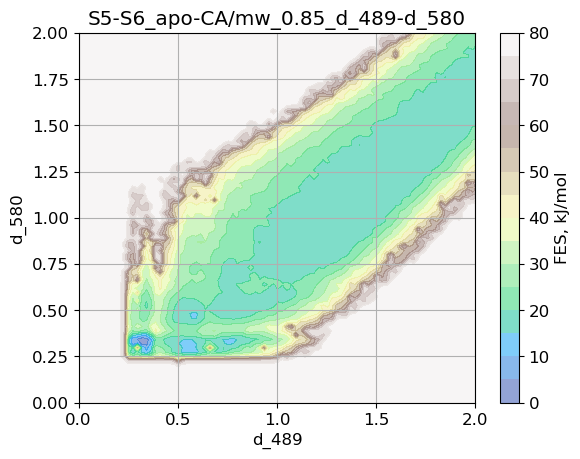

In [99]:
func_reweight_2D('d_489', 'd_580', 220, 220, [0, 5], [0, 5], #60, 
                 xlim=(0, 2), 
                 ylim=(0, 2)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


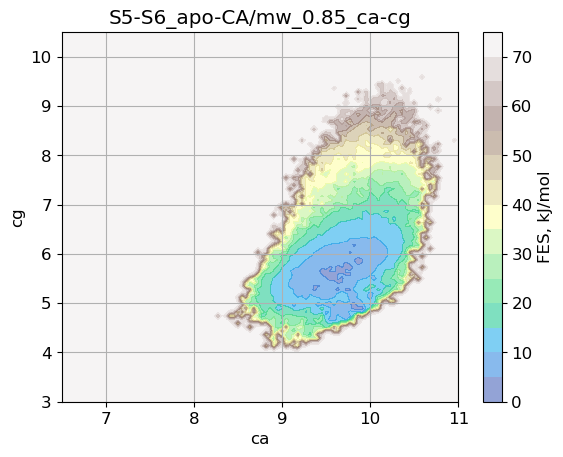

In [100]:
func_reweight_2D('ca', 'cg', 100, 100, [6.5, 11], [3, 10.5], 51, 
                #  xlim=(0, 2), 
                #  ylim=(0, 2)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


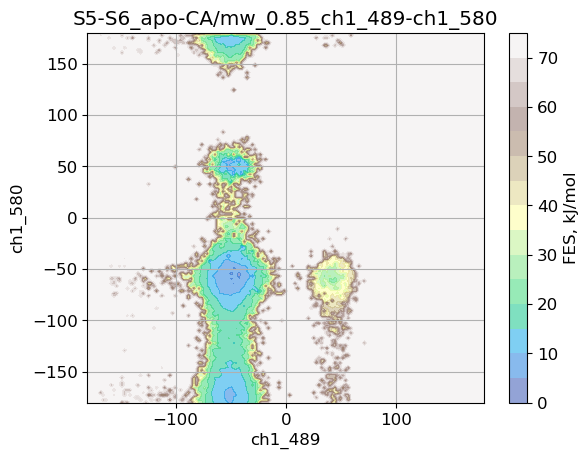

In [101]:
func_reweight_2D('ch1_489', 'ch1_580', 150, 150, [-180, 180], [-180, 180], 26, 
                #  xlim=(0, 2), 
                #  ylim=(0, 2)
                 )


[[ True  True False ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


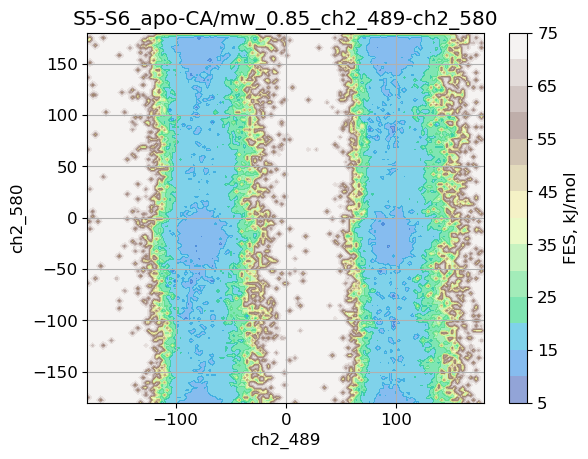

In [102]:
func_reweight_2D('ch2_489', 'ch2_580', 150, 150, [-180, 180], [-180, 180], 26, 
                #  xlim=(0, 2), 
                #  ylim=(0, 2)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


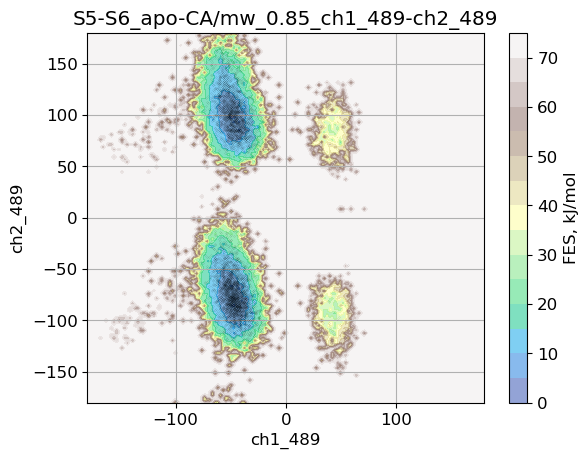

In [103]:
func_reweight_2D('ch1_489', 'ch2_489', 150, 150, [-180, 180], [-180, 180], 30, 
                #  xlim=(0, 2), 
                #  ylim=(0, 2)
                 )

plt.plot(df_CV_bind['ch1_489'], df_CV_bind['ch2_489'], '.', markersize=0.1, label = '489', color = 'k')


[[False False False ... False False  True]
 [False False False ... False False  True]
 [False False False ... False False  True]
 ...
 [ True False False ...  True False  True]
 [False False False ... False False  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


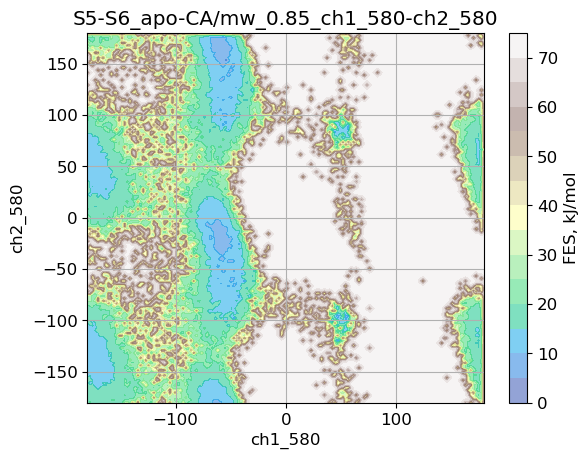

In [104]:
func_reweight_2D('ch1_580', 'ch2_580', 150, 150, [-180, 180], [-180, 180], 26, 
                #  xlim=(0, 2), 
                #  ylim=(0, 2)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


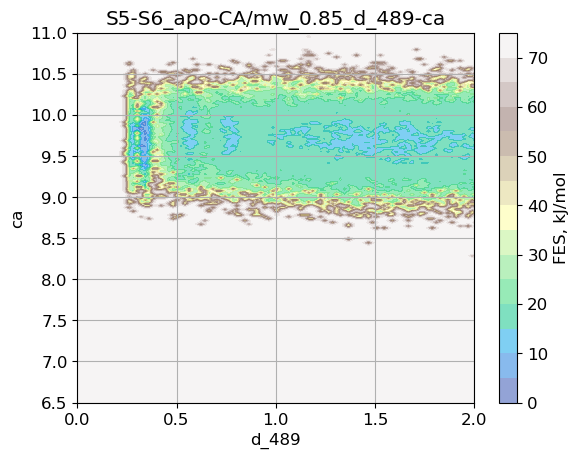

In [105]:
func_reweight_2D('d_489', 'ca', 200, 200, 
                 [0, 4], 
                 [6.5, 11], 
                 40, #26, 
                 xlim=(0, 2), 
                #  ylim=(1, 8)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


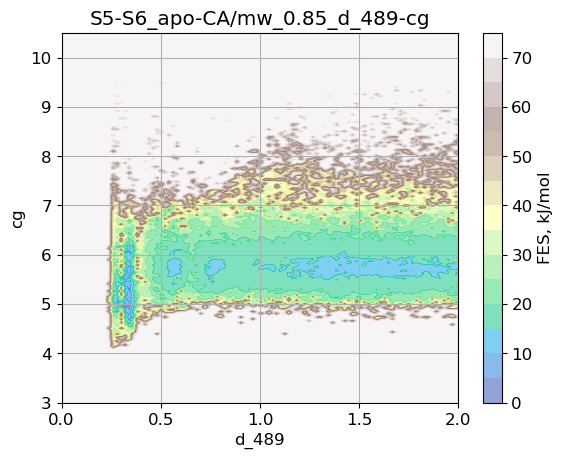

In [106]:
func_reweight_2D('d_489', 'cg', 200, 200, 
                 [0, 4], 
                 [3, 10.5], 
                 #40, #26, 
                 xlim=(0, 2), 
                #  ylim=(1, 8)
                 )

[[ True  True  True ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True False False ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


/tmp/ipykernel_121160/57286144.py:30: UserWarning: The following kwargs were not used by contour: 'aspect'
  h = plt.contourf(ED_new[0], ED_new[1], zi_smoothed.T,


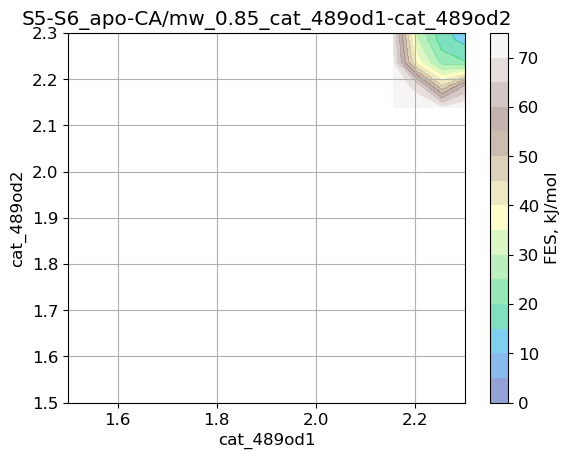

In [107]:
func_reweight_2D('cat_489od1', 'cat_489od2', 1000, 1000, 
                 [df_CV['cat_489od1'].min(), df_CV['cat_489od1'].max()], 
                 [df_CV['cat_489od2'].min(), df_CV['cat_489od2'].max()], 
                 50, #26, 
                 xlim=(1.5, 2.3), 
                 ylim=(1.5, 2.3)
                 )

In [108]:
df_CV['cat_489od2'].min(), df_CV['cat_489od2'].max()

(np.float64(2.13846), np.float64(50.8356))